<a href="https://colab.research.google.com/github/yuyangweng/Project/blob/main/peak_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Peak** **Fitting**


In [2]:
pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
from lmfit import Model
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths

In [5]:
data_path = '/content/drive/MyDrive/1.csv'
headers = ['raman_shift', 'intensity']
df = pd.read_csv(data_path, names=headers)

In [6]:
df

,raman_shift,intensity
0,1054.109619,-11.634156
1,1055.092589,-11.634156
2,1056.075560,-11.634156
3,1057.058530,-11.634156
4,1058.041500,-11.634156
...,...,...
1995,3015.135258,20.742223
1996,3016.118228,10.371119
1997,3017.101198,0.000000
1998,3018.084168,0.000000


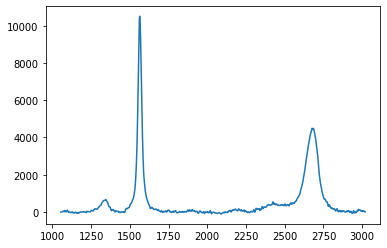

In [7]:
plt.plot(df.raman_shift,df.intensity)

In [8]:
def gaussian(x, amp, cen, wid):
    return (amp * exp(-(x-cen)**2 / (2*wid**2)))


Model 0
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 244
    # variables        = 3
    chi-square         = 484333.707
    reduced chi-square = 2009.68343
    Akaike info crit   = 1858.78013
    Bayesian info crit = 1869.27164
[[Variables]]
    amp:  613.865392 +/- 7.73017791 (1.26%) (init = 655.1589)
    cen:  1335.64772 +/- 0.40681453 (0.03%) (init = 1345.069)
    wid:  27.9766759 +/- 0.40681555 (1.45%) (init = 30.66685)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = -0.577
----------------------------------------------------------------------------------------------------
Model 1
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 114
    # variables        = 3
    chi-square         = 31991522.9
    reduced chi-square = 288211.918
    Akaike info crit   = 1436.10527
    Bayesian info c

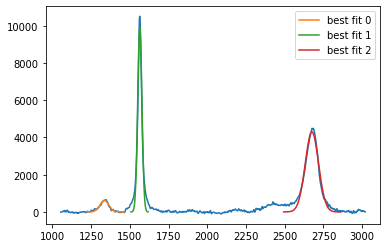

In [39]:
peaks, _ = find_peaks(df.intensity, height=500,distance=150,width=20)
widths=peak_widths(df.intensity, peaks, rel_height=0.5)

wid=widths[0]/2
gmodel = Model(gaussian)
plt.plot(df.raman_shift, df.intensity)

for index, peak in enumerate(peaks):
  range=int(wid[index]*4)
  x=df.raman_shift[peak-range:peak+range]
  y=df.intensity[peak-range:peak+range]
  
  result = gmodel.fit(y, x=x, amp=df.intensity[peak], cen=df.raman_shift[peak], wid=wid[index])
  plt.plot(x, result.best_fit, '-', label='best fit '+str(index))
  print("Model "+str(index))
  print(result.fit_report())
  print('-'*100)
  
plt.legend()
plt.show()
